In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm, kurtosis,skew
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats, optimize
import seaborn as sns

%run ../funtion/Funciones.ipynb

# Exercicio 9
# Self-Organized Criticality (SOC)

In [2]:
def SOC(data, n_bins=50): 
    n = len(data)
    mean = np.mean(data)
    var = np.var(data)
    std = np.std(data)
    #print("mean: ", mean, " var: ", var)
    """ Computa a Taxa Local de Flutuação para cada valor da ST """ 
    Gamma = []
    
    for i in range(0,n): #Gamma.append((data[i] - mean)/var) 
        Gamma.append((data[i] - mean)/std)
    
        """ Computa P[Psi_i] """
        # Retorna o número de elementos em cada bin, bem como os delimitare
    counts, bins = np.histogram(Gamma, n_bins) 
    Prob_Gamma = []
    for i in range(0, n_bins):
        Prob_Gamma.append(counts[i]/n) #plt.plot(Gamma)
    
    return Prob_Gamma, counts

## 30 Endogenas

In [3]:
endogeno1 = np.zeros([8192,10])
endogeno2 = np.zeros([8192,10])
endogeno3 = np.zeros([8192,10])

for t in range(10):
    
    y1,y2,y3 = 0,0,0
    x1,y1 = pmodel (8192, 0.32, 0.4)
    x2,y2 = pmodel (8192, 0.37, 0.4)
    x3,y3 = pmodel (8192, 0.42, 0.4)
    
    endogeno1[:,t] = y1[:]
    endogeno2[:,t] = y2[:]
    endogeno3[:,t] = y3[:]

## 30 Exogenas

In [4]:
exogeno1 = np.zeros([8192,10])
exogeno2 = np.zeros([8192,10])
exogeno3 = np.zeros([8192,10])

for t in range(10):
    
    y1,y2,y3 = 0,0,0
    x1,y1 = pmodel (8192, 0.18, 0.7)
    x2,y2 = pmodel (8192, 0.23, 0.7)
    x3,y3 = pmodel (8192, 0.28, 0.7)
    
    exogeno1[:,t] = y1[:]
    exogeno2[:,t] = y2[:]
    exogeno3[:,t] = y3[:]

## Normalizando as series

In [5]:
endogeno1_norm,endogeno1_esta = Normalizar1(endogeno1)
endogeno2_norm,endogeno2_esta = Normalizar1(endogeno2)
endogeno3_norm,endogeno3_esta = Normalizar1(endogeno3)

exogeno1_norm,exogeno1_esta = Normalizar1(exogeno1)
exogeno2_norm,exogeno2_esta = Normalizar1(exogeno2)
exogeno3_norm,exogeno3_esta = Normalizar1(exogeno3)

In [6]:
Prob_Gamma1,counts1 = SOC(endogeno1_norm)

x1 = np.linspace(1, len(counts1), len(counts1))

log_Prob1 = np.log10(Prob_Gamma1)
log_counts1 = np.log10(counts1)

p1 = np.array(Prob_Gamma1)
p1 = p1[np.nonzero(p1)]
c1 = counts1[np.nonzero(counts1)] 

log_p1 = np.log10(p1)
log_c1 = np.log10(c1)

a1 = (log_p1[np.argmax(c1)] - log_p1[np.argmin(c1)]) / (np.max(c1) - np.min(c1))
b1 = log_Prob1[0]
y1 = b1 * np.power(10, (a1*counts1))

<ipython-input-6-09cb9e058e2e>:5: RuntimeWarning: divide by zero encountered in log10
  log_Prob1 = np.log10(Prob_Gamma1)
<ipython-input-6-09cb9e058e2e>:6: RuntimeWarning: divide by zero encountered in log10
  log_counts1 = np.log10(counts1)


In [7]:
Prob_Gamma2,counts2 = SOC(endogeno2_norm)

x2 = np.linspace(2, len(counts2), len(counts2))

log_Prob2 = np.log10(Prob_Gamma2)
log_counts2 = np.log10(counts2)

p2 = np.array(Prob_Gamma2)
p2 = p2[np.nonzero(p2)]
c2 = counts2[np.nonzero(counts2)] 

log_p2 = np.log10(p2)
log_c2 = np.log10(c2)

a2 = (log_p2[np.argmax(c2)] - log_p2[np.argmin(c2)]) / (np.max(c2) - np.min(c2))
b2 = log_Prob2[0]
y2 = b2 * np.power(20, (a2*counts2))

<ipython-input-7-4eddb041a2ad>:5: RuntimeWarning: divide by zero encountered in log10
  log_Prob2 = np.log10(Prob_Gamma2)
<ipython-input-7-4eddb041a2ad>:6: RuntimeWarning: divide by zero encountered in log10
  log_counts2 = np.log10(counts2)


In [8]:
Prob_Gamma3,counts3 = SOC(endogeno3_norm)

x3 = np.linspace(3, len(counts3), len(counts3))

log_Prob3 = np.log10(Prob_Gamma3)
log_counts3 = np.log10(counts3)

p3 = np.array(Prob_Gamma3)
p3 = p3[np.nonzero(p3)]
c3 = counts3[np.nonzero(counts3)] 

log_p3 = np.log10(p3)
log_c3 = np.log10(c3)

a3 = (log_p3[np.argmax(c3)] - log_p3[np.argmin(c3)]) / (np.max(c3) - np.min(c3))
b3 = log_Prob3[0]
y3 = b3 * np.power(30, (a3*counts3))

<ipython-input-8-3f7f22f3d59c>:5: RuntimeWarning: divide by zero encountered in log10
  log_Prob3 = np.log10(Prob_Gamma3)
<ipython-input-8-3f7f22f3d59c>:6: RuntimeWarning: divide by zero encountered in log10
  log_counts3 = np.log10(counts3)


<ipython-input-9-6ad5c7a3bc3c>:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(counts1), y1,'o--')
<ipython-input-9-6ad5c7a3bc3c>:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(counts2), y2,'o--')
<ipython-input-9-6ad5c7a3bc3c>:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(counts3), y3,'o--')


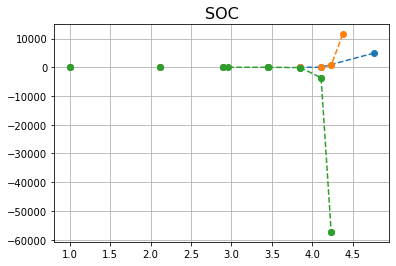

In [9]:
plt.plot(np.log10(counts1), y1,'o--')
plt.plot(np.log10(counts2), y2,'o--')
plt.plot(np.log10(counts3), y3,'o--')
plt.title('SOC', fontsize = 16) 
plt.grid()

<ipython-input-10-3f076fd20ded>:5: RuntimeWarning: divide by zero encountered in log10
  log_Prob = np.log10(Prob_Gamma)
<ipython-input-10-3f076fd20ded>:6: RuntimeWarning: divide by zero encountered in log10
  log_counts = np.log10(counts)
<ipython-input-10-3f076fd20ded>:19: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(counts), y,'o--')


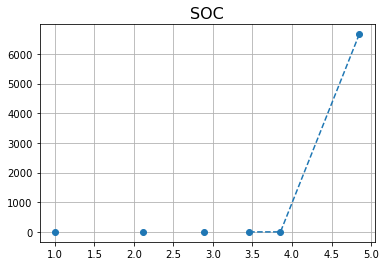

In [10]:
Prob_Gamma,counts = SOC(exogeno3_norm)

x = np.linspace(1, len(counts), len(counts))

log_Prob = np.log10(Prob_Gamma)
log_counts = np.log10(counts)

p = np.array(Prob_Gamma)
p = p[np.nonzero(p)]
c = counts[np.nonzero(counts)] 

log_p = np.log10(p)
log_c = np.log10(c)

a = (log_p[np.argmax(c)] - log_p[np.argmin(c)]) / (np.max(c) - np.min(c))
b = log_Prob[0]
y = b * np.power(10, (a*counts))

plt.plot(np.log10(counts), y,'o--')
plt.title('SOC', fontsize = 16) 
plt.grid()